# Ejercicio Housing por Pablo Ascorbe

Primero vamos a cargar los datos:

In [1]:
from pandas import read_csv

dataframe = read_csv('housing.csv', header=None)
last_ix = len(dataframe.columns) - 1
X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
print(X.shape, y.shape)

(506, 13) (506,)


In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


En este notebook nos vamos a centrar unicamente en el escalado, transformar las dsitribuciones y la selección de características.

Comencemos con el escalado. Pero, primero, vamos a ver el MAE de un modelo, en nuestro caso "RandomForest", sin haber aplicado ninguna técnica:

In [8]:
from numpy import mean
from numpy import absolute
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
pipeline = Pipeline([("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.202


Partimos de un MAE de 2.202, veamos si aplicando las técnicas mencionadas anteriormente mejora. Recordemos que para que mejores necesitaremos que ese valor se aproxime a 0.

## Escalado

### Normalización

In [7]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()

pipeline = Pipeline([("trans",scaler),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.200


Vemos que hemos reducido muy poquito el MAE, veamos si otras técnicas nos ayudan más.

### Estandarización

In [9]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
scaler = StandardScaler()

pipeline = Pipeline([("trans",scaler),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.202


La estandarización vemos que no aporta nada a mejorar el error del modelo.

### Robust Scaler

In [10]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
scaler = RobustScaler()

pipeline = Pipeline([("trans",scaler),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.201


## Cambiar Distribuciones

Como el que mejor resultado nos ha dado ha sido la normalización, será la que utilicemos a partir de ahora:

In [11]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()
power = PowerTransformer(method='box-cox')

pipeline = Pipeline([("trans",scaler),('power', power),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pablo\anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_data.py", line 3058, in fit_transform
    return self._fit(X, y, force_transform=True)
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_data.py", line 3061, in _fit
    X = self._check_input(X, in_fit=True, check_positive=True, check_method=True)
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_data.py", line 3299, in _check_input
    raise ValueError(
ValueError: The Box-Cox transformation can only be applied to strictly positive data


He decidido dejar este error, porque a parte de que se incidió en él en clase, es interesante repasarlo para poder hacer uso de MinMaxScaler y reajustar el intervalo:

In [12]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler(feature_range=(0.5, 1.5))
power = PowerTransformer(method='box-cox')

pipeline = Pipeline([("trans",scaler),('power', power),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.198


Vemos que hemos conseguido bajar un poquito más el MAE, no mucho, pero algo es algo:

In [13]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()
power = PowerTransformer()

pipeline = Pipeline([("trans",scaler),('power', power),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.198


Con ambos conseguimos el mismo MAE.

### Quantile Transform

In [14]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()
dist = QuantileTransformer(n_quantiles=100, output_distribution='normal')

pipeline = Pipeline([("trans",scaler),('dist', dist),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.211


Vemos que añadiendo una transformación por centiles con distribución normal empeora el modelo.

In [18]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()
dist = QuantileTransformer(n_quantiles=100, output_distribution='uniform')

pipeline = Pipeline([("trans",scaler),('dist', dist),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.204


Con distribución uniforme empeora, pero no tanto como con la normal.

### KBinsDiscretizer

In [28]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()

for i in ['uniform', 'quantile', 'kmeans']:
    dist = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy=i)

    pipeline = Pipeline([("trans",scaler),('dist', dist),("model",regr)])

    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # convert scores to positive
    scores = absolute(scores)
    # summarize the result
    s_mean = mean(scores)
    print(f'Estrategia: {i}','Mean MAE: %.3f' % (s_mean))

Estrategia: uniform Mean MAE: 2.578
Estrategia: quantile Mean MAE: 2.480
Estrategia: kmeans Mean MAE: 2.539


Vemos que discretizar nuestras variables no está dando para nada buen resultado, da igual qué estrategia sigamos.

Así que como el mejor resultado lo hemos obtenido al aplicar PowerTransform, nos quedaremos con esa estrategia para la última parte:

## Selección de Características

Primero veamos qué valor de K es el mejor:

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

def select_features(X, y):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X, y)
    X_fs = fs.transform(X)
    return X_fs, fs

X_fs, fs = select_features(X, y)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3.413923
Feature 1: 1.698253
Feature 2: 2.151220
Feature 3: 1.102329
Feature 4: 2.338995
Feature 5: 2.675998
Feature 6: 2.329545
Feature 7: 1.506687
Feature 8: 1.914649
Feature 9: 2.210056
Feature 10: 1.776251
Feature 11: 1.818332
Feature 12: 5.752151


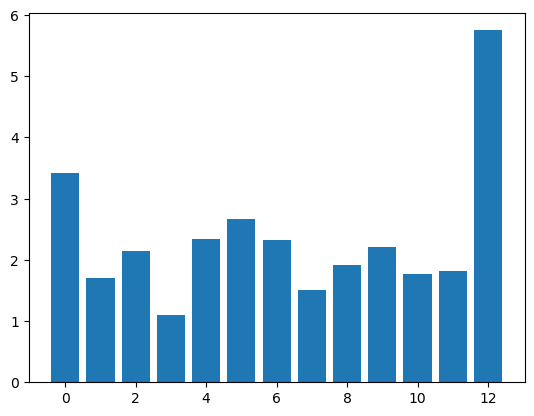

In [36]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Vemos que casi todas las variables son muy interesantes, pero la 0 y la 12, es decir, la primera y la última son las que más aportan.

Primero vamos a probar quitando 5 de 13:

In [37]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

def select_features(X, y):
    fs = SelectKBest(score_func=f_classif, k=8)
    fs.fit(X, y)
    X_fs = fs.transform(X)
    return X_fs, fs

X_fs, fs = select_features(X, y)

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()
power = PowerTransformer()

pipeline = Pipeline([("trans",scaler),('power', power),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_fs, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.356


Vemos que el modelo empeora enormemente si pierde variables, probemos con un k un poco más alto:

In [42]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

def select_features(X, y):
    fs = SelectKBest(score_func=f_classif, k=12)
    fs.fit(X, y)
    X_fs = fs.transform(X)
    return X_fs, fs

X_fs, fs = select_features(X, y)

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()
power = PowerTransformer()

pipeline = Pipeline([("trans",scaler),('power', power),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_fs, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.198


Vemos que quitando 1 solo el modelo se queda igual, pero hemos de pensar que ahora hemos eliminado una característica que aportaba complejidad al modelo.

Vamos a cambiar el score_function:

In [49]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

def select_features(X, y):
    fs = SelectKBest(score_func=f_regression, k=8)
    fs.fit(X, y)
    X_fs = fs.transform(X)
    return X_fs, fs

X_fs, fs = select_features(X, y)

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()
power = PowerTransformer()

pipeline = Pipeline([("trans",scaler),('power', power),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_fs, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.334


In [50]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

def select_features(X, y):
    fs = SelectKBest(score_func=f_regression, k=12)
    fs.fit(X, y)
    X_fs = fs.transform(X)
    return X_fs, fs

X_fs, fs = select_features(X, y)

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()
power = PowerTransformer()

pipeline = Pipeline([("trans",scaler),('power', power),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_fs, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.198


Vemos que el resultado es identico al score_function anterior.

In [69]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline

for i in range(20):
    def select_features(X, y):
        fs = SelectKBest(score_func=mutual_info_regression, k=3)
        fs.fit(X, y)
        X_fs = fs.transform(X)
        return X_fs, fs

    X_fs, fs = select_features(X, y)

    regr = RandomForestRegressor(random_state=0)
    scaler = MinMaxScaler()
    power = PowerTransformer()

    pipeline = Pipeline([("trans",scaler),('power', power),("model",regr)])

    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_fs, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # convert scores to positive
    scores = absolute(scores)
    # summarize the result
    s_mean = mean(scores)
    print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.711
Mean MAE: 2.474
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.474
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.850
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.474
Mean MAE: 2.711
Mean MAE: 2.711
Mean MAE: 2.711


Creo que es importante resaltar esto, si ejecuto reiteradas veces vemos que hay veces donde con solo 3 columnas conseguimos un score de 2.474, que comparado con nuestro inicial de 2.202 es un cambio no mucho peor. Eso significa que hay veces que decide no eliminar una columna que aporta mucha información, entiendo que será la primera o la última como comentabamos antes. Pero lo más interesante es que estamos pasando de un problema en dimensión 13 a uno en tres dimensiones, siendo posible mostrarlo y visualizarlo facilmente.

Este último mutual_info_regression sería el mejor a utilizar en nuestro caso, porque recordemos que tenemos un problema de regresión y esta estrategia es la que más se ajusta en nuestro caso.

Así que como resumen y escribiendo el bloque de código final tendríamos:

In [70]:
from numpy import mean
from numpy import absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from pandas import read_csv

dataframe = read_csv('housing.csv', header=None)
last_ix = len(dataframe.columns) - 1
X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]

def select_features(X, y):
    fs = SelectKBest(score_func=f_regression, k=12)
    fs.fit(X, y)
    X_fs = fs.transform(X)
    return X_fs, fs

X_fs, fs = select_features(X, y)

regr = RandomForestRegressor(random_state=0)
scaler = MinMaxScaler()
power = PowerTransformer()

pipeline = Pipeline([("trans",scaler),('power', power),("model",regr)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_fs, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.198
